## Work
### 請結合前面的知識與程式碼，比較不同的 regularization 的組合對訓練的結果與影響：如 dropout, regularizers, batch-normalization 等

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [15]:
from keras.regularizers import l1_l2
from keras.layers import Dropout
from keras.layers import BatchNormalization
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=0.0, l2_ratio=0.0, drp_ratio=0.0):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    BN =BatchNormalization()(input_layer)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1_l2(l1=l1_ratio, l2=l2_ratio))(BN)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1_l2(l1=l1_ratio, l2=l2_ratio))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model


In [13]:
"""Code Here
設定超參數
"""
l1_ratio=1e-12
l2_ratio=1e-12
drp_ratio=0.2
LEARNING_RATE=1e-2
MOMENTUM=0.95
EPOCHS=30
BATCH_SIZE= 256

In [16]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
model = build_mlp(input_shape=x_train.shape[1:],l1_ratio=l1_ratio, l2_ratio=l2_ratio, drp_ratio=drp_ratio)
optimizer= keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=optimizer)

model.fit(x_train, y_train,
         epochs=EPOCHS,
         batch_size=BATCH_SIZE,
         validation_data=(x_test,y_test),
         shuffle=True)

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

W1106 15:28:41.339483  1612 deprecation.py:506] From C:\Users\HAO\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W1106 15:28:41.473865  1612 deprecation_wrapper.py:119] From C:\Users\HAO\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1106 15:28:41.484864  1612 deprecation_wrapper.py:119] From C:\Users\HAO\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W1106 15:28:42.129934  1612 deprecation.py:323] From C:\Users\HAO\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.op

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 36s 726us/step - loss: 1.8537 - acc: 0.3388 - val_loss: 1.5860 - val_acc: 0.4408
Epoch 2/30
50000/50000 [==============================] - 28s 563us/step - loss: 1.6188 - acc: 0.4261 - val_loss: 1.4936 - val_acc: 0.4741
Epoch 3/30
50000/50000 [==============================] - 25s 493us/step - loss: 1.5357 - acc: 0.4541 - val_loss: 1.4342 - val_acc: 0.4922
Epoch 4/30
50000/50000 [==============================] - 23s 468us/step - loss: 1.4714 - acc: 0.4768 - val_loss: 1.4124 - val_acc: 0.5053
Epoch 5/30
50000/50000 [==============================] - 23s 460us/step - loss: 1.4159 - acc: 0.4995 - val_loss: 1.3776 - val_acc: 0.5098
Epoch 6/30
50000/50000 [==============================] - 23s 465us/step - loss: 1.3781 - acc: 0.5119 - val_loss: 1.3444 - val_acc: 0.5222
Epoch 7/30
50000/50000 [==============================] - 23s 459us/step - loss: 1.3340 - acc: 0.5298 - val_loss: 1.

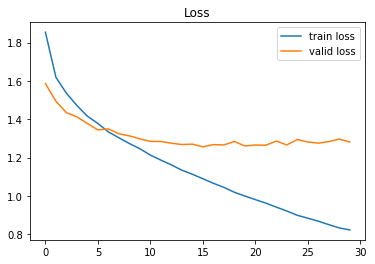

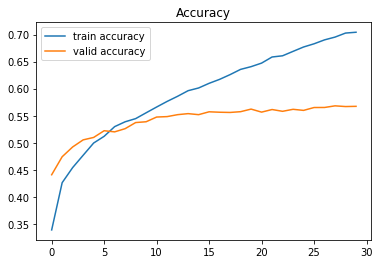

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()